# 🚢 Logistic Regression on Titanic Dataset
This notebook demonstrates how to build a **Logistic Regression model** for predicting Titanic survival using Python and scikit-learn.

Steps covered:
1. Load dataset
2. Preprocess data
3. Train-test split
4. Train Logistic Regression model
5. Evaluate performance
6. Visualize results


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

## Step 1: Load Titanic Dataset

In [12]:
# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Step 2: Data Preprocessing

In [13]:
# Select relevant features and drop rows with missing values
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df_model = df[features + ['survived']].dropna()

# Convert categorical columns to numeric using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['sex','embarked'], drop_first=True)
df_model.head()

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


## Step 3: Train-test Split

In [14]:
X = df_model.drop('survived', axis=1)
y = df_model['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Step 4: Train Logistic Regression Model

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [16]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [17]:
y_pred_prob

array([0.79113604, 0.30472951, 0.20037505, 0.47809852, 0.22247026,
       0.22923263, 0.08073118, 0.63060537, 0.04869846, 0.96412247,
       0.66238789, 0.38810238, 0.95282967, 0.47923457, 0.12598293,
       0.43933402, 0.76250227, 0.10487375, 0.10089198, 0.09202559,
       0.60429025, 0.09599871, 0.61839963, 0.28395435, 0.29231482,
       0.15376262, 0.68740301, 0.35079229, 0.37003184, 0.17605199,
       0.96185129, 0.5470067 , 0.08885172, 0.1039017 , 0.71472379,
       0.93380922, 0.31908806, 0.51638767, 0.49143983, 0.05628572,
       0.07530343, 0.66538812, 0.25187357, 0.08698481, 0.07475085,
       0.71538148, 0.25273553, 0.6265846 , 0.93748369, 0.59208887,
       0.88106619, 0.88927348, 0.14021485, 0.92212211, 0.95346981,
       0.47944934, 0.42259282, 0.58873937, 0.06908932, 0.30140094,
       0.15036008, 0.36239133, 0.07761827, 0.04441116, 0.10882007,
       0.07359674, 0.29466365, 0.65404121, 0.95428128, 0.26420695,
       0.05483467, 0.08375999, 0.90745882, 0.92150939, 0.09736

## Step 5: Evaluate Model

In [18]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.80

Confusion Matrix:
[[72 13]
 [16 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.76      0.72      0.74        58

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



## Step 6: ROC Curve

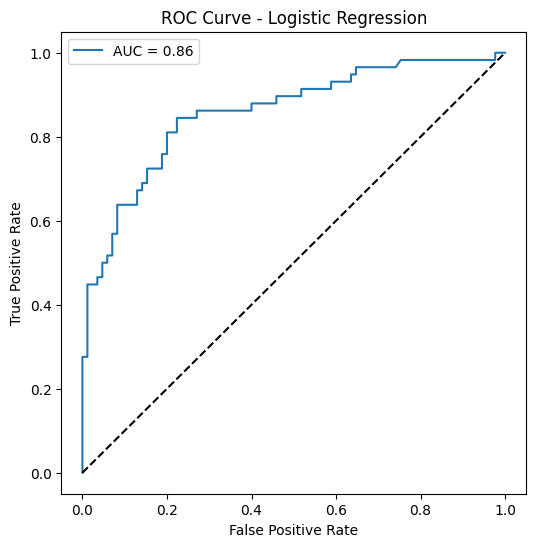

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()